In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
batch_size = 256

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
mnist_train = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transform, # 텐서로 변환
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size)
                                    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def visualize_image(data,index,pred=False,val=0):
    plt.imshow(data[index].reshape(28,28))
    plt.axis('off')
    plt.show()

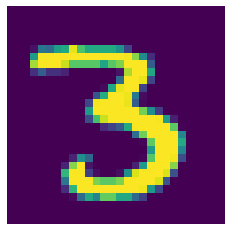

In [ ]:
visualize_image(mnist_train.data,12)

In [ ]:
import torch.nn.functional as F

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)

In [ ]:
EPOCHS = 5
model.train()
for epoch in range(EPOCHS):
    correct = 0
    for batch_idx, (X, y) in enumerate(train_loader):
        var_X_batch = X.to(device)
        var_y_batch = y.to(device)
        optimizer.zero_grad()
        output = model(var_X_batch)
        loss = criterion(output, var_y_batch)
        loss.backward()
        optimizer.step()

        # Total correct predictions
        predicted = torch.max(output.data, 1)[1] 
        correct += (predicted == var_y_batch).sum()
        #print(correct)
        if batch_idx % 50 == 0:
            print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                epoch, batch_idx*len(X), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(correct*100) / float(256*(batch_idx+1))))

Epoch : 0 [0/60000 (0%)]	Loss: 2.315496	 Accuracy:15.234%
Epoch : 0 [12800/60000 (21%)]	Loss: 0.733028	 Accuracy:59.597%
Epoch : 0 [25600/60000 (43%)]	Loss: 0.412306	 Accuracy:70.641%
Epoch : 0 [38400/60000 (64%)]	Loss: 0.380976	 Accuracy:76.030%
Epoch : 0 [51200/60000 (85%)]	Loss: 0.354560	 Accuracy:79.452%
Epoch : 1 [0/60000 (0%)]	Loss: 0.301497	 Accuracy:91.406%
Epoch : 1 [12800/60000 (21%)]	Loss: 0.201754	 Accuracy:92.624%
Epoch : 1 [25600/60000 (43%)]	Loss: 0.277777	 Accuracy:92.532%
Epoch : 1 [38400/60000 (64%)]	Loss: 0.150441	 Accuracy:92.956%
Epoch : 1 [51200/60000 (85%)]	Loss: 0.175935	 Accuracy:93.282%
Epoch : 2 [0/60000 (0%)]	Loss: 0.270615	 Accuracy:92.969%
Epoch : 2 [12800/60000 (21%)]	Loss: 0.181085	 Accuracy:94.156%
Epoch : 2 [25600/60000 (43%)]	Loss: 0.103262	 Accuracy:94.442%
Epoch : 2 [38400/60000 (64%)]	Loss: 0.149219	 Accuracy:94.676%
Epoch : 2 [51200/60000 (85%)]	Loss: 0.115115	 Accuracy:94.796%
Epoch : 3 [0/60000 (0%)]	Loss: 0.211847	 Accuracy:93.359%
Epoch : 3 [1

In [ ]:
correct = 0 
for test_imgs, test_labels in test_loader:
    #print(test_imgs.shape)
    test_imgs = test_imgs.to(device)
    test_labels = test_labels.to(device)
    output = model(test_imgs)
    predicted = torch.max(output,1)[1]
    correct += (predicted == test_labels).sum()
print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*256)))

Test accuracy:0.942% 
